In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Reading the encoded and clean DataFrame
df_encoded = pd.read_pickle('./data/processed/processed.pkl')
df_encoded.head(5)

,Age Range,Gender,Occupation,Household Size,Consideration of Household Needs,Rating of Internet Service Features,Entertainment,Searching Information,Communication or Messaging,News,...,Internet,Social Media Coms,Television,Radio,"Billboards, Posters or Stickers outdoors",Newspapers or magazines,Price Matches,Best,Best2,Least
0,0,1,19,2,1,18,0,1,0,0,...,1,1,0,0,0,0,1,2,4,2
1,1,1,3,4,1,7,1,1,1,0,...,0,0,0,0,0,0,0,0,4,2
2,0,1,19,5,1,10,1,0,0,0,...,0,0,0,0,0,0,0,2,0,2
3,0,1,21,4,0,1,1,1,1,1,...,0,1,0,0,1,0,1,0,2,3
4,0,1,9,4,0,25,1,1,1,1,...,1,1,0,0,0,0,0,3,3,2


Note: I am using the original dataframe (Spanish version) in order to have the same clusters of the research project for my degree. Otherwise I would get different clusters due to the coding done by scikit-learn that changes between languages.

In [3]:
# Reading the encoded and clean DataFrame 
df_encoded_spanish = pd.read_pickle('./data/processed/spanish.pkl')
df_encoded_spanish.head(5)

,Seleccione el rango de edad que incluye su edad,¿Cuál es su sexo?,Especifique su ocupación laboral,¿Cuántas personas conviven en total en su casa? Incluido/a usted,"¿A la hora de adquirir algún servicio de internet, considera o consideraría las necesidades de los otros miembros de su casa?",Califique las siguientes características del servicio de Internet al momento adquirirlo en función de su importancia para usted,Entretenimiento,Obtención de Información,Comunicación o mensajería,Noticias,...,Internet,Redes Sociales.1,Televisión,Radio,"Vallas, Carteles o pegatinas en exteriores",Periódicos o revistas,Coinciden Precios,Mas,Mas2,Menos
0,0,1,22,2,1,23,0,1,0,0,...,1,1,0,0,0,0,1,3,2,0
1,1,1,3,4,1,6,1,1,1,0,...,0,0,0,0,0,0,0,1,2,0
2,0,1,22,5,1,27,1,0,0,0,...,0,0,0,0,0,0,0,3,3,0
3,0,1,10,4,0,2,1,1,1,1,...,0,1,0,0,1,0,1,1,0,4
4,0,1,7,4,0,16,1,1,1,1,...,1,1,0,0,0,0,0,2,4,0


In [4]:
lenght=len(df_encoded_spanish.columns)

In [5]:
# Create an instance of the PCA class
pca = PCA()

# Fit the PCA model to the encoded Spanish DataFrame
pca.fit(df_encoded_spanish)

# Transform the encoded Spanish DataFrame using PCA
pca_data_scaled = pca.transform(df_encoded_spanish)

# Get the explained variance ratio of each principal component
var = pca.explained_variance_ratio_

# Print the explained variance ratios
print(var)

[5.29203057e-01 3.19673672e-01 4.60312750e-02 2.24967365e-02
 1.35753383e-02 1.15218513e-02 1.07417875e-02 6.97702861e-03
 5.24442120e-03 4.27213314e-03 2.91890192e-03 2.79967063e-03
 2.46951668e-03 2.32516422e-03 2.18172113e-03 1.83054250e-03
 1.67049843e-03 1.53536615e-03 1.48227988e-03 1.26107324e-03
 1.11957795e-03 1.04257893e-03 9.53238776e-04 9.16759756e-04
 8.16361016e-04 7.56172180e-04 6.30498888e-04 6.09915618e-04
 4.81085713e-04 4.55785661e-04 4.37911270e-04 4.08529658e-04
 3.64469028e-04 3.19842721e-04 1.97109705e-04 1.35870787e-04
 8.88484085e-05 5.34090324e-05 4.41228860e-33]


Text(0, 0.5, '% Variance')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

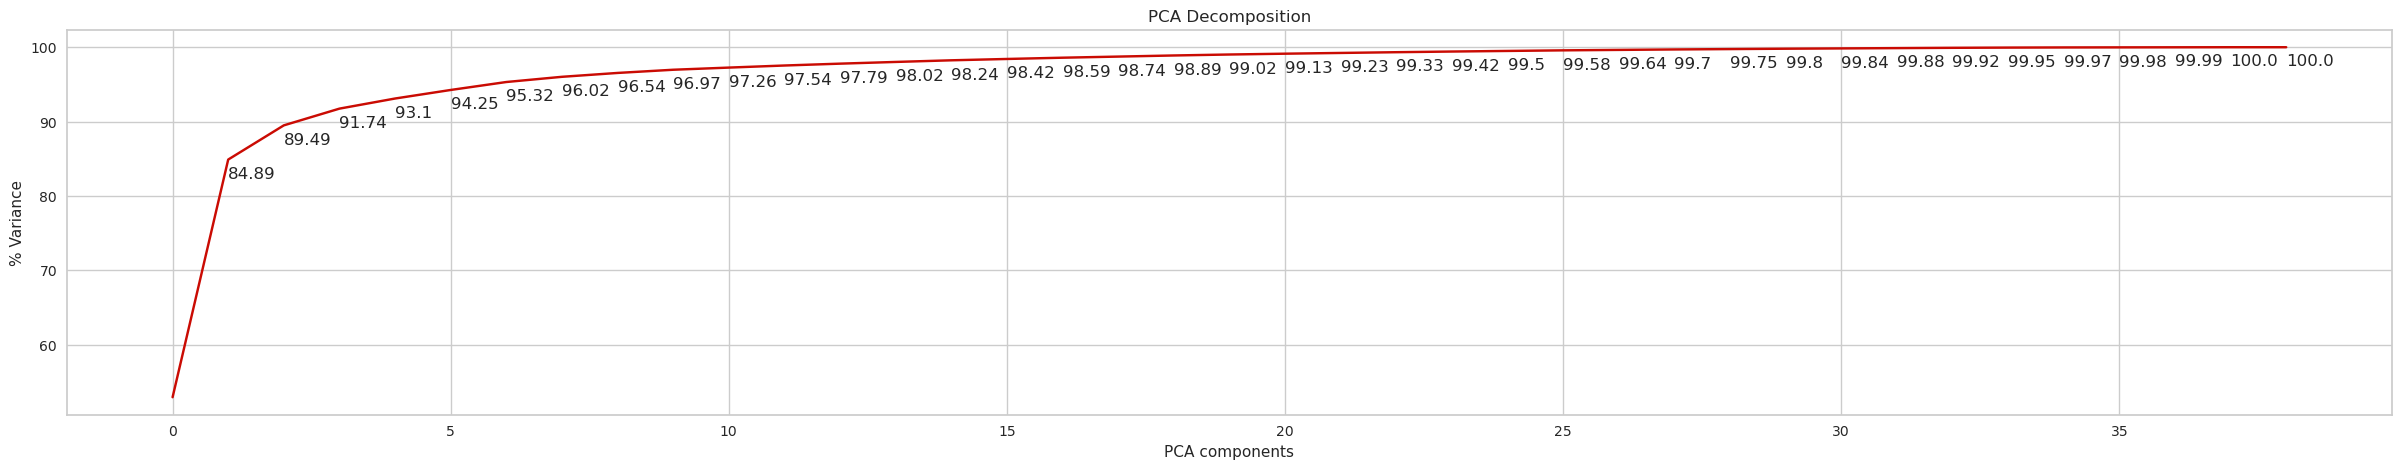

In [6]:
# Calculate the cumulative explained variance
cum_var = np.cumsum(np.round(var, decimals=4) * 100)

# Create a list of component indices
components = list(range(0, len(var)))

# Set the figure size for the plot
plt.figure(figsize=(30, 5))

# Iterate over components and cumulative variance to add annotations
for s, d in zip(components, cum_var):
    plt.annotate(np.round(d, decimals=2), xy=(s, d - 2.5))

# Plot the cumulative explained variance
plt.plot(components, cum_var, 'r-x')

# Set the title and labels for the plot
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

In [7]:
# Create a DataFrame from the scaled PCA data
pca_data_standard = pd.DataFrame(pca_data_scaled)

# Drop columns from index 6 to the end (excluding index 6)
pca_data_standard.drop([x for x in range(6, lenght)], axis=1, inplace=True)


In [8]:
# Create empty lists to store the results
Sum_of_squared_distances = []
silhouette_scores = []

# Define the range of values for the number of clusters (K)
K = range(2, 10)

# Set the seed for reproducibility
seed = 66

# Iterate over each value of K
for num_clusters in K:
    # Create a KMeans object with the specified number of clusters
    km = KMeans(n_init='auto', init='k-means++', n_clusters=num_clusters, random_state=seed)
    
    # Perform clustering and obtain the cluster labels for each data point
    y = km.fit_predict(pca_data_standard)
    
    # Calculate and store the sum of squared distances within each cluster
    Sum_of_squared_distances.append(km.inertia_)
    
    # Calculate and store the silhouette score for the clustering result
    silhouette_scores.append(silhouette_score(pca_data_standard, y))


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

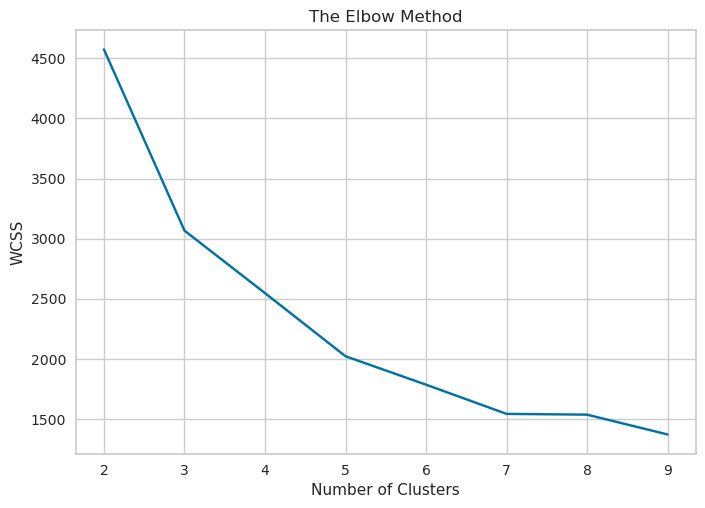

In [9]:
#Plot of the Elbow Method

plt.plot(K, Sum_of_squared_distances)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

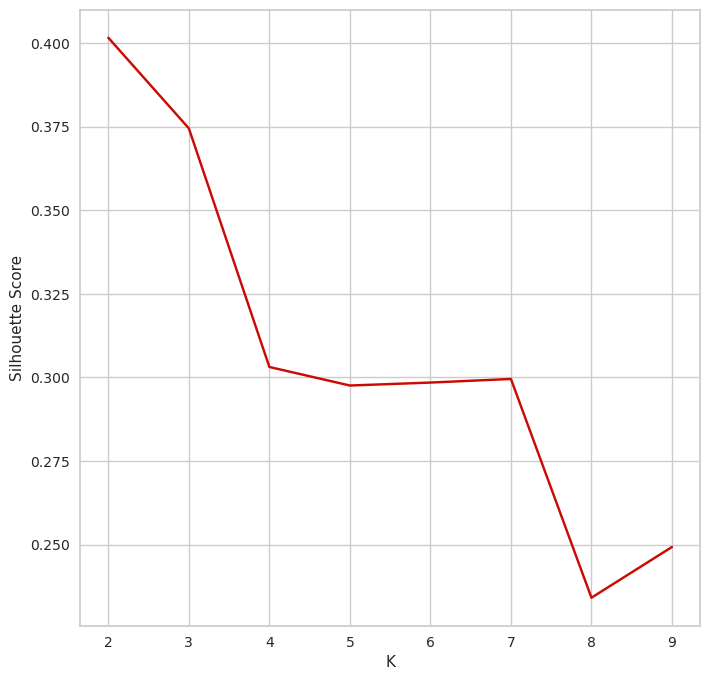

In [10]:
#Plot of the silhouette scores
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

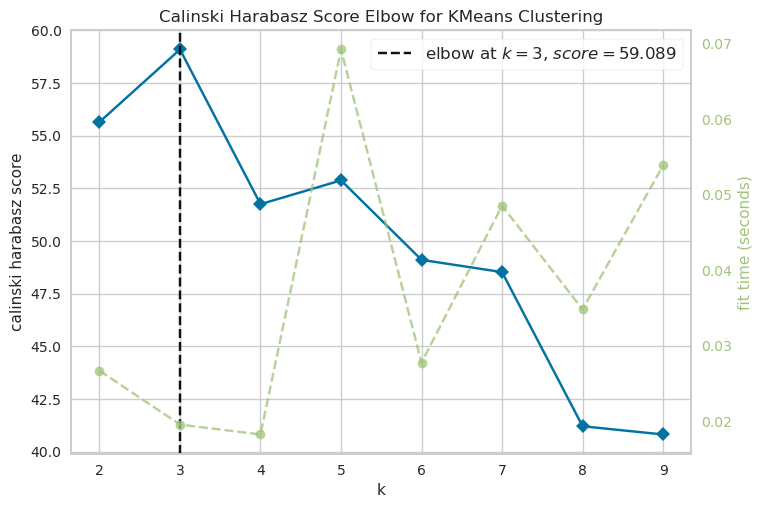

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
# Create and fit the KElbowVisualizer with calinski_harabasz
visualizer = KElbowVisualizer(km,metric='calinski_harabasz', k=(2,10))
visualizer.fit(pca_data_standard)        
visualizer.show()   

Based on the analysis using multiple evaluation metrics, it was determined that 3 clusters should be selected for the dataset. 

The Elbow Method, Silhouette Score, and Calinski-Harabasz were utilized to make this determination. 

The Elbow Method visually inspects the sum of squared distances against different numbers of clusters. It indicates the number of clusters where the rate of improvement decreases significantly, forming an elbow shape. In this case, the elbow point suggested that 3 clusters should be chosen.

The Silhouette Score measures how well each data point fits within its assigned cluster and compares it to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters. The Silhouette Score for the 3-cluster solution was calculated to be [insert Silhouette Score value], indicating that it is a reasonable choice.

Calinski-Harabasz is another evaluation metric that assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher values of Calinski-Harabasz indicate better-defined and well-separated clusters. In this case, the Calinski-Harabasz score for the 3-cluster solution was considered significant and supported the selection.

Therefore, based on the analysis using the Elbow Method, Silhouette Score, and Calinski-Harabasz, it was determined that 3 clusters provide an appropriate partitioning of the dataset.

In [12]:
# Perform K-means clustering and obtain 3 cluster labels
km = KMeans(n_init='auto',init='k-means++',n_clusters = 3,random_state=seed)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))

0.3745026715440567


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, n_init='auto',
                                      random_state=66))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

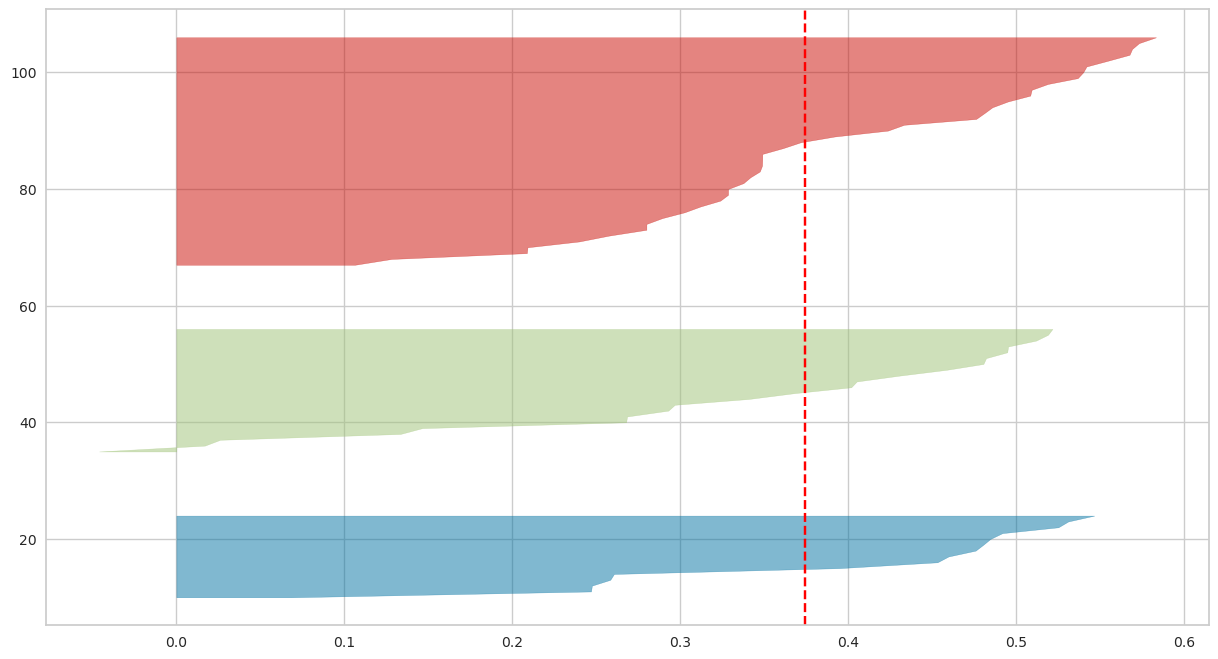

In [13]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pca_data_standard)

Note: The cluster label is assigned to the translate dataframe for futher analysis

In [14]:
# Assign cluster labels to a column in the DataFrame 'df_encoded'
df_encoded['k_means_pca'] = y

df_encoded.to_pickle('./data/processed/k_means_pca.pkl')